# Plane wall with Dirichlet boundary conditions: linear variation of conductivity

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/cghiaus/var_cond/HEAD?labpath=notebooks%2F02_1_dirichlet_1ord.ipynb)

Let's consider heat transfer in steady-state, without internal source in a plane wall for which the conductivity varies linearly with temperature:

$$
\lambda = \lambda_0(1 + \beta (T - T_b))
$$

We will consider that the wall, of width $w$, has [Dirichlet boundary conditions](https://en.wikipedia.org/wiki/Dirichlet_boundary_condition): $T_0$ in $x = 0$ and $T_1$ in $x = w$.

## Analytical solution

[Heat equation](https://en.m.wikipedia.org/wiki/Heat_equation) for a non-uniform isotropic medium,

$$
\rho c_p \frac{\partial T}{\partial t} = div ( \lambda \textbf{ grad} T) + q_v
$$

where $q_v$ is the volumetric source, reduces to:

$$
\frac{d}{dx} \lambda \frac{dT}{dx} = 0
$$

Then,

$$
\lambda \frac{dT}{dx} = A
$$

where $A$ is a constant. Note that from [Fourier's law](https://en.wikipedia.org/wiki/Thermal_conduction#Fourier%27s_law), the [heat flux](https://en.wikipedia.org/wiki/Heat_flux) is constant:

$$
\varphi = - \lambda \frac{dT}{dx} = -A
$$

Replacing $\lambda$ by its linear expression, we obtain:

$$
\lambda_0 (1 + \beta (T - T_b)) \frac{d T}{d x} = A
$$

Changing the variable $\theta ≡ T - T_b$, and 
using the [separation of variables](https://en.wikipedia.org/wiki/Separation_of_variables), we obtain:

$$
\lambda_0 (1 + \beta \theta) \ d \theta = A \ dx
$$

which, by integration, yields:

$$
\theta + \beta \frac{\theta^2}{2} = \frac{A}{\lambda_0} x + \frac{B}{\lambda_0}
$$

By substituting $C ≡ A / \lambda_0$ and $D ≡ D / \lambda_0$, we obtain:

$$
\theta + \beta \frac{\theta^2}{2} = C x + D
$$

The constants $C$ and $D$ are obtained from boundary conditions:

- at $x = 0$, $T = T_0$ and $\theta = \theta_0 ≡ T_0 - T_b$; it results

$$
D = \theta_0 + \beta \frac{\theta_0^2}{2} = (T_0 - T_b) + \beta \frac{(T_0 - T_b)^2}{2}
$$

- at $x = w$, $T = T_1$ and $\theta = \theta_1 ≡ T_1 - T_b$; it results:

$$
C = \frac{\theta_1 - \theta_0}{w} \left ( 1 + \beta \frac{\theta_0 + \theta_1}{2} \right) = \frac{T_1 - T_0}{w} \left ( 1 + \beta \left (\frac{T_0 + T_1}{2} - T_b \right) \right)
$$

From equation $\theta + \beta \frac{\theta^2}{2} = C x + D$, it results the temperature distribution as a function of $x$:

$$
\theta = -b + \sqrt{b^2 - c}
$$

or

$$
T = -b + \sqrt{b^2 - c} + T_b
$$

where:
- $b = \frac{1}{\beta}$
- $c = -\frac{2}{\beta}(Cx + D)$

From equation $\theta + \beta \frac{\theta^2}{2} = C x + D$, we obtain:

$$
\theta = - \frac{1}{\beta} \pm \sqrt{\frac{1}{\beta^2} + \frac{2}{\beta}(Cx + D)}
$$

By considering only the solution with physical meaning, we obtain the distribution of the reduced temperature:

$$
\theta = - \frac{1}{\beta} + \sqrt{\left (  \frac{1}{\beta } + \theta_0 \right )^2 + \frac{2}{\beta}Cx}
$$

or of the temperature:

$$
T = - \frac{1}{\beta} + \sqrt{\left (  \frac{1}{\beta } + T_0 - T_b \right )^2 + \frac{2}{\beta}Cx} + Tb
$$

and the [heat flux](https://en.wikipedia.org/wiki/Heat_flux):

$$
\varphi = -\lambda_0 C = \lambda_0 \frac{T_0 - T_1}{w} \left ( 1 + \beta \frac{T_0 + T_1}{2} - T_b \right )
$$

or the [heat flow rate](https://en.wikipedia.org/wiki/Rate_of_heat_flow):

$$
q = \varphi S = \lambda_0 \frac{T_0 - T_1}{w} S \left ( 1 + \beta \frac{T_0 + T_1}{2} - T_b \right )
$$

where $S$ is the [surface area](https://en.wikipedia.org/wiki/Surface_area) of the plane wall.

## Numerical solution

For the numerical solution, the wall is divided in $n_b$ number of branches.

### Thermal circuit
![therm_circ](./figures/var_cond_dirichlet.svg)

> Figure 1. Thermal circuit for numerical solution.

In case the number of branches is $n_b = 3$, the matrices and vectors of the thermal circuit are:

$$
A = \begin{bmatrix}
1 & 0\\ 
-1 & 1\\ 
0 & -1
\end{bmatrix}
; \
G = \begin{bmatrix}
G_0 & 0 & 0 \\ 
0 & G_1 & 0\\ 
0 & 0 & G_2 
\end{bmatrix}
; \
b = \begin{bmatrix}
T_0\\ 
0\\ 
-T_1
\end{bmatrix}
$$

$$
f = \begin{bmatrix}
0 & 0
\end{bmatrix}^T
$$

The solution of the system is

$$\left\{\begin{array}{ll}
\theta = (A^T G A)^{-1}(A^T G b + f)\\ 
q = G (-A \theta + b)
\end{array}\right.$$

### Conductances

Considering that, for a conductance with boundary temperatures $T_0$ and $T_1$ the mean conductivity is:

$$
\bar{\lambda} = \lambda_0 \left[1 + \beta \left(\frac{T_0 + T_1}{2} - T_b \right ) \right]
$$

the conductances of the thermal circuit are:

- $G_0 = \frac{\bar \lambda_0}{w/n_b}$; $\bar{\lambda_0} = \lambda_0 \left[1 + \beta \left(\frac{T_0 + \theta_0}{2} - T_b \right ) \right]$

- $G_1 = \frac{\bar \lambda_1}{w/n_b}$; $\bar{\lambda_1} = \lambda_0 \left[1 + \beta \left(\frac{\theta_0 + \theta_1}{2} - T_b \right ) \right]$

- $G_2 = \frac{\bar \lambda_2}{w/n_b}$; $\bar{\lambda_2} = \lambda_0 \left[1 + \beta \left(\frac{\theta_1 + T1}{2} - T_b \right ) \right]$

Written in a matrix form,

$$
\bar \lambda = \lambda_0 (I + \beta \ \mathrm{diag}(\bar \theta))
$$

and 

$$
G = \frac{1}{w/n_b} \bar \lambda
$$

where:
- $\bar \lambda$ - diagonal matrix of average conductivities;
- $\lambda_0$ - scalar conductivity for base temperature $T = T_b$;
- $I$ - [identity matrix](https://en.m.wikipedia.org/wiki/Identity_matrix);
- $\beta$ - scalar temperature coefficient;
- $\mathrm{diag}(\bar \theta)$ - diagonal matrix of $(\frac{T_0 + T_1}{2} - T_b)$ where:
    - $\frac{T_0 + T_1}{2}$ - mean of the boundary temperatures of the conductance;
    - $T_b$ - base temperature in λ = λ(T).

### Iterative method

[Iterative methods](https://en.m.wikipedia.org/wiki/Iterative_method) are computational algorithms employed to approximate solutions through successive refinement of an initial guess until meeting a convergence criterion. In the context of the problem under study, the initial guess could represent the temperature distribution or the values of conductances, while the convergence criterion is determined by the variation in temperature distribution or conductance values from one iteration to the next. 

#### Convergence criterion

We will consider as convergence criterion the variation of temperature measured by the [maximum norm](https://en.wikipedia.org/wiki/Uniform_norm):

$$
\left \| \varepsilon \right \|_\infty ≡ \mathrm{max}(|\theta - \theta_0|) = \mathrm{max}(|\theta_{[0]} - \theta_{0,[0]}|,... ,|\theta_{[n]} - \theta_{0,[n]}|)
$$

where $\theta_0$ is the previous temperature and $\theta$ is the current temperature. In this case, the convergence is reached faster if the temperature difference between the surfaces of the plane wall are smaller. If the convergence of conductances were used, the number of interations would be the same independetly on the temperature difference.

#### Validation

The validation of the iterative method can be done by comparing the temperature distribution with those obtained analytically:

$$
T = - \frac{1}{\beta} + \sqrt{\left (  \frac{1}{\beta } + T_0 - T_b \right )^2 + \frac{2}{\beta}Cx} + Tb
$$


The heat flux obtained by using the numerical method,

$$
q_n = G (-A \theta + b)
$$

can be compared with the heat flux obtained analytically,

$$
q_a = \lambda_0 \frac{T_0 - T_1}{w} \left ( 1 + \beta \frac{T_0 + T_1}{2} - T_b \right )
$$

and with the heat flux obtained by using the average conductivity,

$$
\bar{\lambda} = \lambda_0 \left[1 + \beta \left(\frac{T_0 + T_1}{2} - \theta_0 \right ) \right]
$$

$$
q_m = \bar\lambda \frac{T_0 - T_1}{w}
$$

> Figure 2. Comparaison between numerical and analytical solutions when temperature distribution is an intial guess.

#### Conductance initial guess

The [iterative method](https://en.m.wikipedia.org/wiki/Iterative_method) considering temperature as intial guess is:

- initially, consider conductances calculated with conductivity $\lambda_0$:

$$
G_0 = \frac{\lambda_0}{w/n_b} I
$$
where $I$ is an [identity matrix](https://en.m.wikipedia.org/wiki/Identity_matrix) of size the number of branches $n_b$.

- with $G_0$, estimate:

$$
\theta_0 = (A^T G A)^{-1}(A^T G b + f)
$$

- __while__ $\varepsilon > \varepsilon_{admitted}$:
    - $ \bar \theta_k = (\theta_{k-1} + \theta_k) / 2$, $k=0, ... , n_b-1$,
    $\theta_{-1}=T_0$, $\theta_{n_b-1}=T_1$
    - $G = \frac{1}{w/n_b} \lambda_0 (I + \beta \ \mathrm{diag}(\bar \theta))$
    - $\theta = (A^T G A)^{-1}(A^T G b + f)$
    - $\varepsilon = \mathrm{max}(|\theta - \theta_0|)$
    - $\theta_0 \leftarrow  \theta$
- $q = G (-A \theta + b)$

Note that supposing that the conductance is constant results in a uniform distribution of temperatures.

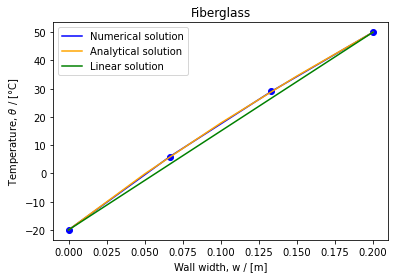

In [4]:
import sys
sys.path.append('../src')  # Add 'scr' directory to the system path
import var_cond

# Data
w = 0.20                    # m, width of the plane wall
nb = 3                      # number of branches, nb > 1
T0, T1 = -20, 50            # °C, boundary temperatures
Tb = 20                     # °C, mean (base) temperature
deg = 1

a, b = 0.0002, 0.04         # fitted λ(T) = a * T + b

# Model λ(T) = a*T + b to λ(T) = λ0 * (1 + β * (T - Tb))
λ0, β, θ0 = var_cond.poly2model([a, b], Tb, deg)

cond_model = [λ0, β, Tb, deg]
width_mesh = [w, nb]
surf_temp = [T0, T1]

# Numerical solution
θ_n, q_n, x_n = var_cond.dirichlet_num(cond_model, width_mesh, surf_temp)

# Analytical solution
θ_a, q_a, x_a = var_cond.dirichlet_anal(cond_model, w, surf_temp, num=5)

var_cond.dirichlet_plot(x_n, θ_n, x_a, θ_a, T0, T1, 'Fiberglass')

> Figure 3. Comparaison between numerical and analytical solutions when conductance is an intial guess.

In [2]:
# Flow rate using average conductivity
λm = λ0 * (1 + β * ((T0 + T1) / 2 - Tb))
q_m = λm / w * (T0 - T1)

print('Flow rate / m²:')
print(f'q_n = {q_n[0]:.2f} W/m² - numerical solution')
print(f'q_a = {q_a:.2f} W/m² - analytical solution')
print(f'q_m = {q_m:.2f} W/m² - solution using mean conductivity')

Flow rate / m²:
q_n = -15.05 W/m² - numerical solution
q_a = -15.05 W/m² - analytical solution
q_m = -15.05 W/m² - solution using mean conductivity


## References

- [Ouksel T, (2020)](http://tele-ens.univ-oeb.dz/moodle/pluginfile.php/131239/mod_resource/content/1/Cours_Transfert_3L_Maintenance-Industrielle_OUKSEL.pdf). Cours Transfert Thermique, Université Larbi Ben M’hidi Oum El Bouaghi, Algeria

- [Cengel Y. & Ghajar A. (2020)](https://www.studocu.com/row/document/celal-bayar-universitesi/engineering-mechanics/heat-chap02-094-this-is-summaries/11179160). Chapter 2 Heat condution equatiion, in Heat and Mass Transfer: Fundamentals and Applications, 6th Edition, Solution manual, McGraw-Hill Education